In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
dataset = pd.read_csv("test1.csv")
dataset.head()

,ID,Disease,Symtom_01,Symtom_02,Symtom_03
0,1,Fungal infection,itching,skin rash,skin eruptions
1,2,Fungal infection,skin rash,skin eruptions,spots on the skin
2,3,Fungal infection,itching,skin eruptions,spots on the skin
3,4,Fungal infection,itching,skin rash,spots on the skin
4,5,Allergy,red rash,cracked skin,blisters


In [86]:
symtomsArray01 = np.array(dataset.Symtom_01)
symtomsArray01 = list(dict.fromkeys(symtomsArray01))
index = 0
for i in symtomsArray01:
    dataset.Symtom_01[dataset.Symtom_01 == i] = index
    index = index+1

<ipython-input-86-48574ee8dbe0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Symtom_01[dataset.Symtom_01 == i] = index


In [87]:
symtomsArray02 = np.array(dataset.Symtom_02)
symtomsArray02 = list(dict.fromkeys(symtomsArray02))
index = 0
for j in symtomsArray02:
    dataset.Symtom_02[dataset.Symtom_02 == j] = index
    index = index+1

<ipython-input-87-a75cf3b6a4a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Symtom_02[dataset.Symtom_02 == j] = index


In [89]:
symtomsArray03 = np.array(dataset.Symtom_03)
print(symtomsArray03)
symtomsArray03 = list(dict.fromkeys(symtomsArray03))
index = 0
for k in symtomsArray03:
    dataset.Symtom_03[dataset.Symtom_03 == k] = index
    index = index+1
    
print(dataset)

[0 1 1 1 2 3 4 5 6 6 6 7 8 9 10 11 12 13 14 15 16 17 4 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 16 32 33 34 35 36 37 38 39 40 41 42 8 43 8 44 45
 10 46 47 48 49 50 51 52 51 53 53 54 55 56 57 57 58 12 59 60 61 62 63 64
 51 12 65 12 66 67 67 68 69 70 71 72 72 73 74 75 76 74 75 77 78 59 79 80
 80 81 82 83 84 16 85 86 87 88 89 90 8 91 92 16 51 40 93 94 85 95 96 95 4
 97 98 99 98 97 46 100 101 102 103 104 105 106 107 9 108 11 12 13 109 15
 16 110 111 112 19 113 114 43 115 116 47 117 118 47 119 51 120 121 121 122
 123 124 125 126 127 126 128 16 129 130 131 30 132 19 133 43 134 135 136
 135 137 138]
      ID           Disease Symtom_01 Symtom_02 Symtom_03
0      1  Fungal infection         0         0         0
1      2  Fungal infection         1         1         1
2      3  Fungal infection         0         1         1
3      4  Fungal infection         0         0         1
4      5           Allergy         2         2         2
..   ...               ...       ...       ...       ...

<ipython-input-89-1a167b1af607>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Symtom_03[dataset.Symtom_03 == k] = index


In [83]:
X = dataset.iloc[:,[2,3,4]].values
y = dataset.iloc[:, 1].values

print(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [57]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                               precision    recall  f1-score   support

                                                  Dehydration       0.00      0.00      0.00         0
                                                       Anemia       0.00      0.00      0.00         0
                                                 Appendicitis       0.50      1.00      0.67         1
                                                    Arthritis       0.33      1.00      0.50         1
                                   Blood in Urine (Hematuria)       0.00      0.00      0.00         2
                                                      Catarrh       0.00      0.00      0.00         0
                                          Cervical spondylosi       0.00      0.00      0.00         0
                                                   Ches

C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall 

In [61]:
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

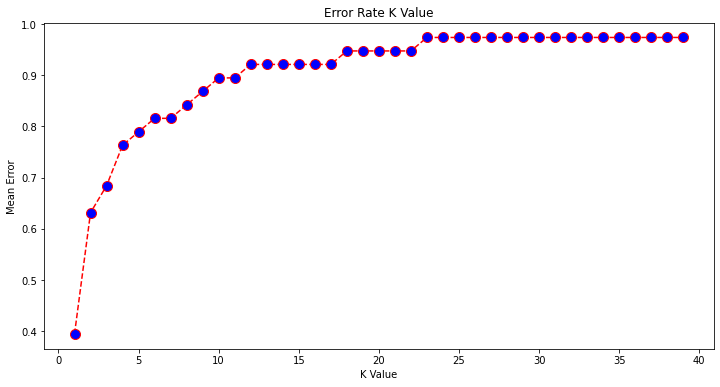

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [63]:
pred=knn.predict(X_test)# getting predictons for the algorithm for test data
print("Accuracy={}%".format((sum( y_test==pred)/ y_test.shape[0])*100))

Accuracy=2.631578947368421%


In [64]:
import joblib


In [65]:
joblib.dump(classifier,'RFModelforMPG.pkl')

['RFModelforMPG.pkl']

In [ ]:
temp = {}
temp['Symtom_01'] = 'red rash'
temp['Symtom_02'] = 'sneezing'
temp['Symtom_03'] = 'chills'



X = dataset.iloc[:,temp].values

testdata = scaler.transfrom(temp)